# R Consortium ISC Grants
## TidyTuesday Week-08

## Libraries and Data

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [7]:
url_data = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-20/isc_grants.csv"
raw  = pd.read_csv(url_data)

## Fonts and Colors

In [3]:

from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
from matplotlib import rcParams
#rcParams['axes.spines.top'] = False
#rcParams['axes.spines.right'] = False
rcParams['font.family'] = 'Roboto'
rcParams['font.size'] = '12'

## Data Wrangling

In [8]:
raw.head(3)

,year,group,title,funded,proposed_by,summary,website
0,2023,1,The future of DBI (extension 1),10000,Kirill Müller,This proposal mostly focuses on the maintenanc...,NaN
1,2023,1,Secure TLS Communications for R,10000,Charlie Gao,The project aims to implement secure connectio...,NaN
2,2023,1,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer,This ISC funded project focuses on the develop...,NaN


In [9]:
raw.describe()

,year,group,funded
count,85.000000,85.000000,85.000000
mean,2019.141176,1.400000,13781.141176
std,2.082540,0.492805,11325.802194
min,2016.000000,1.000000,0.000000
25%,2017.000000,1.000000,6000.000000
50%,2019.000000,1.000000,10000.000000
75%,2021.000000,2.000000,16000.000000
max,2023.000000,2.000000,62400.000000


In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         85 non-null     int64 
 1   group        85 non-null     int64 
 2   title        85 non-null     object
 3   funded       85 non-null     int64 
 4   proposed_by  85 non-null     object
 5   summary      85 non-null     object
 6   website      52 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.8+ KB


In [12]:
raw.columns

Index(['year', 'group', 'title', 'funded', 'proposed_by', 'summary',
       'website'],
      dtype='object')

In [15]:
dff = raw.loc[:, ['year', 'group', 'title', 'funded', 'proposed_by']]
dff.head(3)

,year,group,title,funded,proposed_by
0,2023,1,The future of DBI (extension 1),10000,Kirill Müller
1,2023,1,Secure TLS Communications for R,10000,Charlie Gao
2,2023,1,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer


In [18]:
df  =  dff.rename(columns={'group' : 'cycle', 'funded':'amount', 'proposed_by':'requester'})
df['cycle'] = np.where(df['cycle'] == 1, 'Spring', 'Fall')
df.head(3)

,year,cycle,title,amount,requester
0,2023,Spring,The future of DBI (extension 1),10000,Kirill Müller
1,2023,Spring,Secure TLS Communications for R,10000,Charlie Gao
2,2023,Spring,volcalc: Calculate predicted volatility of che...,12265,Kristina Riemer


## Dataviz

### Average  funding amount per year

<Axes: title={'center': 'Average Funding By  Year'}, xlabel='year'>

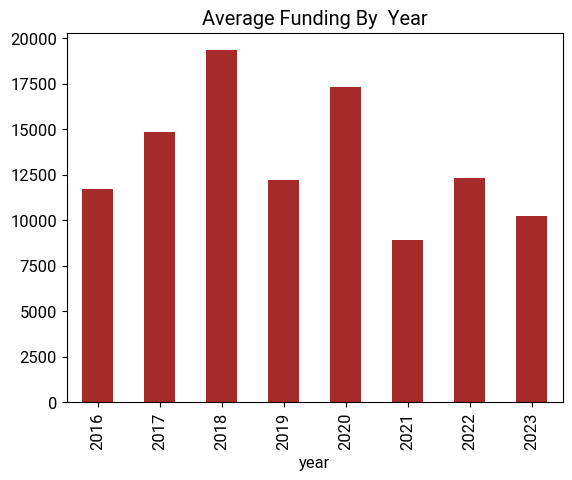

In [25]:
df.groupby('year')['amount'].mean().plot(kind = 'bar', color = 'brown', title = 'Average funding by  year')

### Average Funding By cycle

In [ ]:
bycycle = df.groupby(['year', 'cycle'])['amount'].mean().reset_index()



